In [1]:
# PLOTS THE NIRISS BACKGROUND MODELS FROM EACH PIPELINE
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sys.path.append('./scripts')
from utils import load_plt_params, pipeline_dictionary

# set the matplotlib parameters
pltparams=load_plt_params()

COLOR = pltparams[pltparams['name']=='text.color']['value'][0]

pipeline_dict = pipeline_dictionary()

plt.rcParams['font.size'] = 10

figsize = (7.20472, 7)

sys.path.append('/Users/belugawhale/Documents/GitHub/nirhiss/')
from src.nirhiss.utils import get_MAD_sigma

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_7027/2092483912.py:150: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure4.jpg',


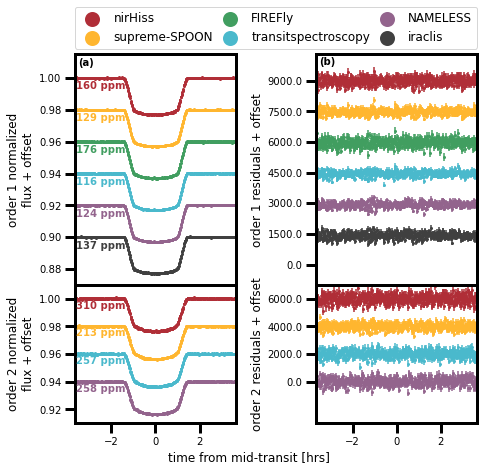

In [2]:
fig = plt.figure(figsize=figsize)
gs = GridSpec(3,2, figure=fig, height_ratios=[0.1, 2, 1.2])
fig.set_facecolor('w')

ax1 = fig.add_subplot(gs[1,0]) # white light curves (Order 1)
ax2 = fig.add_subplot(gs[1,1]) # residuals (Order 1)
ax3 = fig.add_subplot(gs[2,0]) # white light curves (Order 2)
ax4 = fig.add_subplot(gs[2,1]) # residuals (Order 2)

ax_legend = fig.add_subplot(gs[0,:]) # legend axes

axes = [[ax1, ax2], [ax3, ax4]]

# defines offsets between each light curve/residuals
offset_lc = np.full(len(list(pipeline_dict.keys())), 0.02)
offset_resid = np.full(len(list(pipeline_dict.keys())), 0.002)


resid_lims = [-1000,1000]
lc_lims = [0.972, 1.001]
xlim = [-3, 3]


names = ['ADF', 'MCR', 'ZR', 'NE', 'LPC', 'AT']
pipelines = ['nirHiss',  'supreme-SPOON', 'FIREFly',
             'transitspectroscopy', 'NAMELESS', 'iraclis']

order = 1

for x in range(len(names)):

    data = np.load('./data/wlcs/{0}-order{1}-white-light-curve.npy'.format(names[x],
                                                                            order),
                   allow_pickle=True)

    labelxticks=False

    idx_oot = np.append(np.arange(0,200,1,dtype=int),np.arange(400,517,1,dtype=int))
    mad = get_MAD_sigma(np.median(data[1][idx_oot] - 1.),
                             data[1][idx_oot] - 1.)  * 1e6

    axes[0][0].text(s='{} ppm'.format(int(np.round(mad))),
                   x=-3.6, y=0.993-np.nansum(offset_lc[:x]),
                   color=pipeline_dict[names[x]]['color'],
                   fontsize=10., fontweight='bold')

    if names[x] == 'AT' or names[x] == 'CMADF':
        factor = 1
    else:
        factor=1e6


    kwargs = {'color':pipeline_dict[names[x]]['color'], 'linestyle':'',
              'marker':'.', 'markersize':4}

    axes[0][0].errorbar(data[0], data[1]/np.nanmedian(data[1])-np.nansum(offset_lc[:x]),
                       yerr=data[2], **kwargs)

    ax_legend.scatter(data[0], data[1]/np.nanmedian(data[1]), s=100,
                      label=pipelines[x],
                      color=pipeline_dict[names[x]]['color'])

    axes[0][1].errorbar(data[0], data[3]/factor-np.nansum(offset_resid[:x]/1.32),
                       yerr=data[4]/factor,
                       **kwargs)
order=2
for x in [0, 1, 3, 4]:

    data = np.load('./data/wlcs/{0}-order{1}-white-light-curve.npy'.format(names[x],
                                                                            order),
                   allow_pickle=True)

    labelxticks=False

    idx_oot = np.append(np.arange(0,200,1,dtype=int),np.arange(400,517,1,dtype=int))
    mad = get_MAD_sigma(np.median(data[1][idx_oot] - 1.),
                         data[1][idx_oot] - 1.)  * 1e6

    if names[x] == 'NE':
        y = 2
    elif names[x] == 'LPC':
        y = 3
    else:
        y = x + 0

    axes[1][0].text(s='{} ppm'.format(int(np.round(mad))),
                   x=-3.6, y=0.993-np.nansum(offset_lc[:y]),
                   color=pipeline_dict[names[x]]['color'],
                   fontsize=10., fontweight='bold')

    mad = get_MAD_sigma(np.median(data[3] - 1.), data[3] - 1.)

    if names[x] == 'CMADF':
        factor = 1
    else:
        factor=1e6

    kwargs = {'color':pipeline_dict[names[x]]['color'], 'linestyle':'',
              'marker':'.', 'markersize':4}

    axes[1][0].errorbar(data[0], data[1]/np.nanmedian(data[1])-np.nansum(offset_lc[:y]),
                       yerr=data[2], **kwargs)
    axes[1][1].errorbar(data[0], data[3]/factor-np.nansum(offset_resid[:y]),
                       yerr=data[4]/factor,
                       **kwargs)

axes[0][0].set_ylabel('order 1 normalized\nflux + offset', fontsize=12)
axes[0][1].set_ylabel('order 1 residuals + offset', fontsize=12)
axes[0][0].set_ylim(0.87, 1.015)
axes[0][1].set_ylim(-0.01, 0.0013)

axes[1][0].set_ylabel('order 2 normalized\nflux + offset', fontsize=12)
axes[1][1].set_ylabel('order 2 residuals + offset', fontsize=12)
axes[1][0].set_ylim(0.91, 1.01)
axes[1][1].set_ylim(-0.009, 0.001)

yticks = np.linspace(-0.009, 0, 7)
axes[0][1].set_yticks(yticks)
axes[0][1].set_yticklabels(np.flip(np.abs(np.round(yticks*1e6,1))))

yticks = np.linspace(-0.006, 0, 4)
axes[1][1].set_yticks(yticks)
axes[1][1].set_yticklabels(np.flip(np.abs(yticks*1e6)))

axes[0][0].text(s='(a)', x=-3.5, y=1.008, fontweight='bold')
axes[0][1].text(s='(b)', x=-3.5, y=0.0008, fontweight='bold')

axes[1][0].set_xlabel('time from mid-transit [hrs]', fontsize=12, x=1.08)

for ax in axes[0]:
    ax.set_rasterized(True)
    ax.set_xlim(-3.65, 3.65)
for ax in axes[1]:
    ax.set_rasterized(True)
    ax.set_xlim(-3.65, 3.65)

plt.xlim(-3.65, 3.65)
plt.subplots_adjust(hspace=0, wspace=0.5)

ax_legend.set_xlim(-10,-9)

leg = ax_legend.legend(bbox_to_anchor=(0.0,4, 1, .102),
                 ncol=3, mode='expand', borderaxespad=0., fontsize=12)

for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
ax_legend.set_axis_off()

#plt.tight_layout()
plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure4.jpg',
            #transparent=True,
            rasterize=True, bbox_inches='tight', dpi=300)
